In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mapping import map_str_values
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [9]:
X_train = pd.read_csv("data/train_values.csv")
Y_train = pd.read_csv("data/train_labels.csv")

In [10]:
mapped_X = map_str_values(X_train).iloc[:, 1:]


In [11]:
color_map = {
    1:"red",
    2:"green",
    3:"blue"
}

colors = Y_train["damage_grade"].map(color_map)
Y_train["color"] = colors
Y_train


,building_id,damage_grade,color
0,802906,3,blue
1,28830,2,green
2,94947,3,blue
3,590882,2,green
4,201944,3,blue
...,...,...,...
260596,688636,2,green
260597,669485,3,blue
260598,602512,3,blue
260599,151409,2,green


In [22]:
pca = PCA(n_components=3, random_state=192)
scaler = StandardScaler()
mapped_X = scaler.fit_transform(mapped_X)
X0 = pca.fit_transform(mapped_X)
X0

array([[-1.02689511, -0.93918571, -0.17650944],
       [ 0.02958639, -0.36117325,  0.44028292],
       [-1.02326321, -0.43352413,  0.1858698 ],
       ...,
       [ 0.17547273, -0.98663826, -0.07402425],
       [ 3.95251814,  1.94858092, -1.37960057],
       [-0.04431634, -1.45918582, -0.90530122]])

In [13]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [14]:
X0[:, 0]

array([ 5940.10069042, -3445.85301972,  2715.09031169, ...,
        1905.05151697, -4406.94386198,  2843.05290009])

In [15]:
Y_train["color"]

0          blue
1         green
2          blue
3         green
4          blue
          ...  
260596    green
260597     blue
260598     blue
260599    green
260600     blue
Name: color, Length: 260601, dtype: object

Text(0.5, 0, 'PC3')

<Figure size 640x480 with 0 Axes>

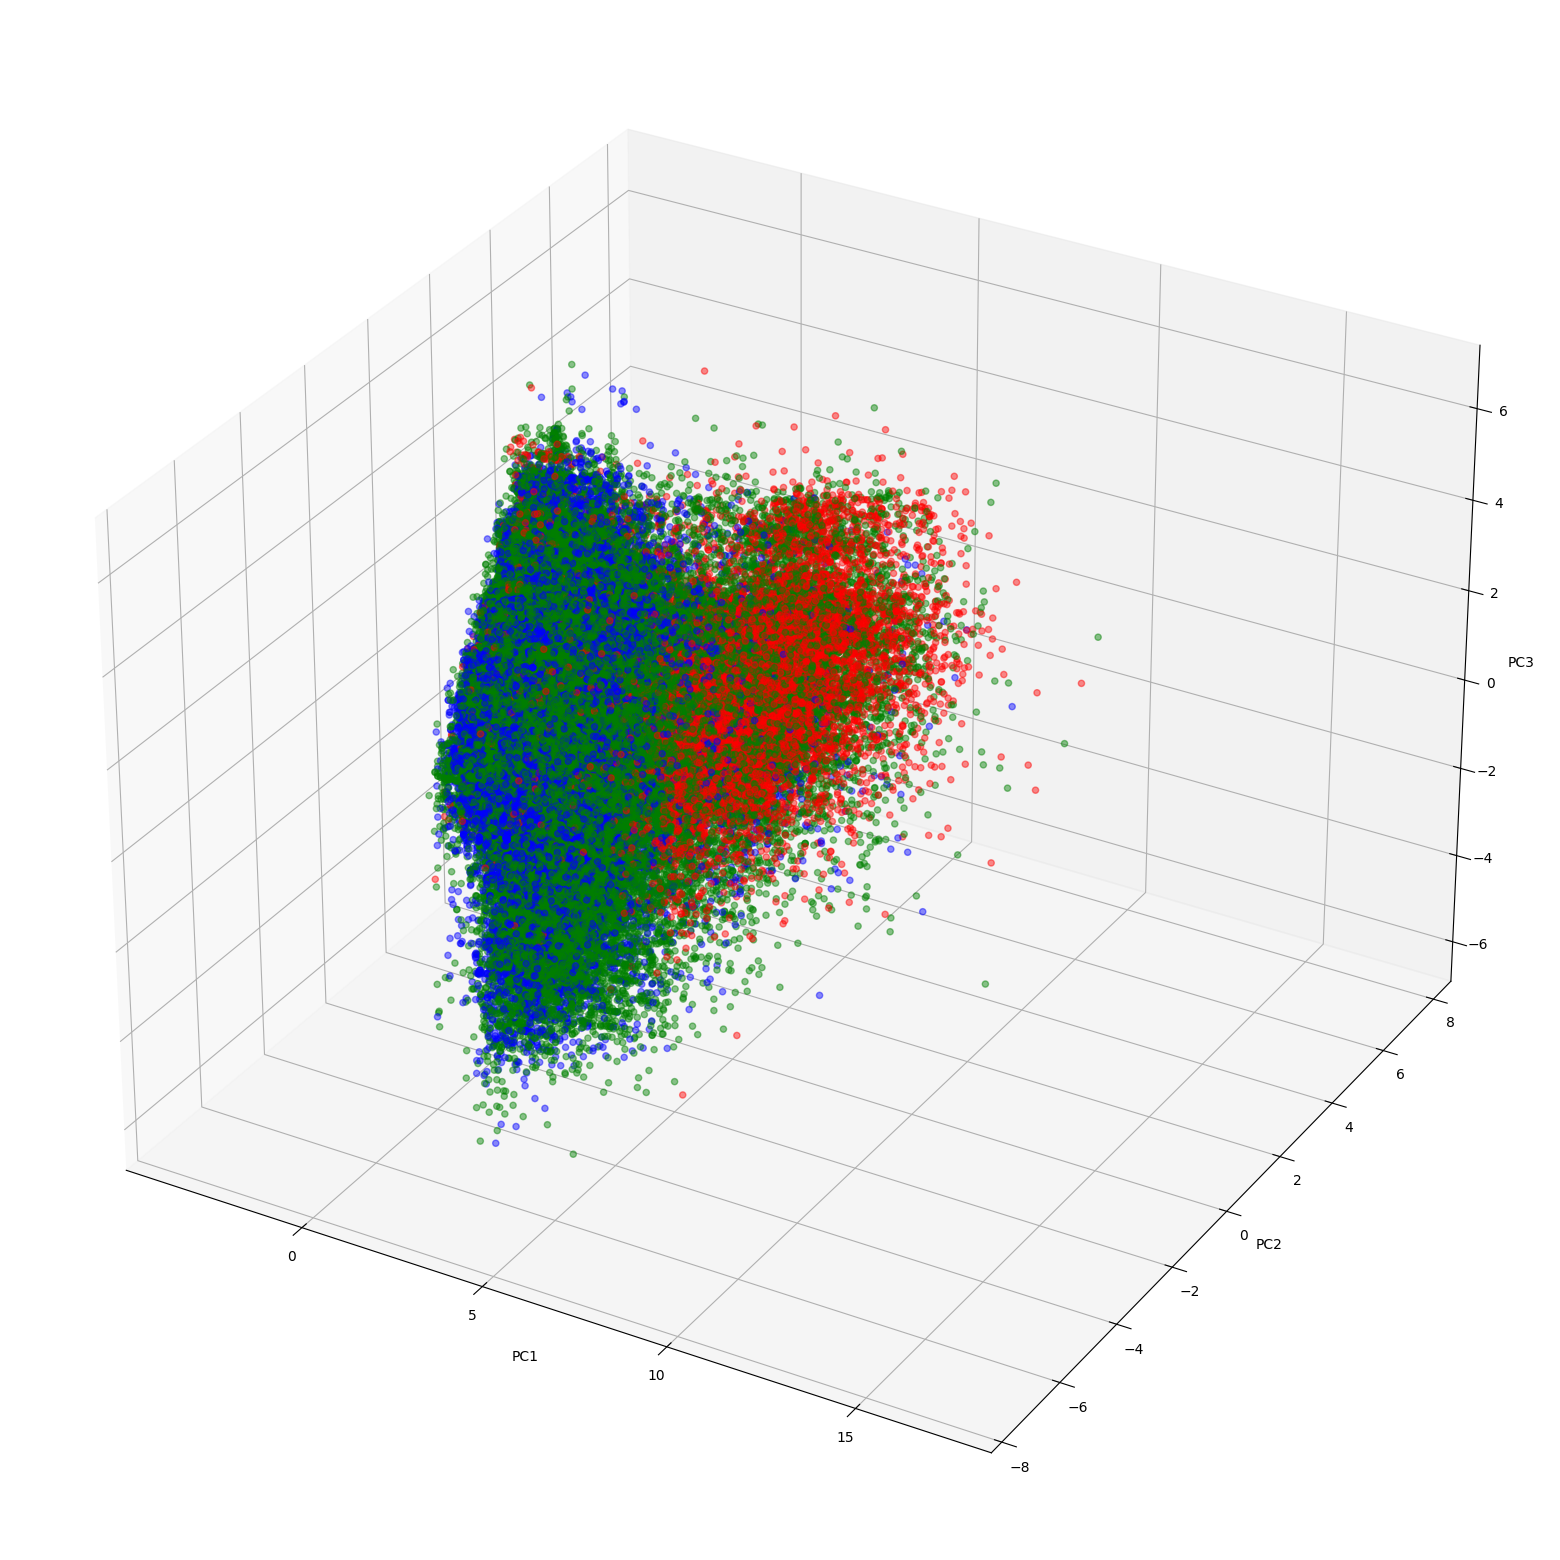

In [24]:
fig = plt.figure()
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c=Y_train["color"], marker="o", alpha=0.45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

In [17]:
plt.show()